In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind, fisher_exact
from scipy.stats.contingency import odds_ratio
import itertools as it
from collections import Counter
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages
from functools import reduce
from scipy.stats import kstest,ttest_ind

In [27]:
phenotype_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/train_cohort_bmi.csv.gz"
combo_files = [
    "/data6/deepro/ukb_bmi/3_characterization/data/combo_info/british/discovery_combo2.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/combo_info/british/discovery_combo3.csv"
]

phenotype_df = pd.read_csv(phenotype_file, usecols=["sample_names", "bmi", "bmi_prs"], dtype={"sample_names":  str, "bmi": float, "bmi_prs": float})
combo_df = pd.concat([pd.read_csv(cf) for cf in combo_files])


In [3]:
combo_df["combo_genes"] = combo_df.uniq_items.str.replace("Input_", "").str.split("|") 
combo_genes = set("|".join(combo_df.uniq_items.str.replace("Input_", "").values).split("|"))
combo_samples = set("|".join(combo_df.combo_samples.fillna("").values).split("|"))

In [4]:
def get_vtype_df(block_df, combo_genes, combo_samples):
    # select lof and deleterious missense variants
    block_df = block_df.loc[(block_df.lof==True)|(block_df.splice_lof==True)|((block_df.missense==True)&(block_df.del_score>4))]
    block_df["samples"] = block_df.samples.str.split(",")
    block_df = block_df.explode("samples")
    block_df = block_df.loc[(block_df.samples.isin(combo_samples)) & (block_df.gene.isin(combo_genes))]
    return block_df

vcfs_per_chrm = {
    "chr1": 97, "chr2": 71, "chr3": 56, "chr4": 39, "chr5": 43, "chr6": 48, 
    "chr7": 47, "chr8": 35, "chr9": 42, "chr10": 40, "chr11": 57, "chr12": 52, 
    "chr13": 18, "chr14": 30, "chr15": 34, "chr16": 47, "chr17": 56, "chr18": 16, 
    "chr19": 65, "chr20": 25, "chr21": 11, "chr22": 23, "chrX": 24, "chrY": 1
}
annot_table_dir = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/exome_annot/data/annot_tables_vep109"

cohort_df = pd.DataFrame()
for chr_num in [f"chr{i}" for i in range(1,23)] + ["chrX", "chrY"]:
    print(chr_num)
    chr_file_num = vcfs_per_chrm[chr_num]
    for filei in range(chr_file_num):
        block_file = os.path.join(annot_table_dir, f"{chr_num}", f"block_{filei}.tsv.gz")
        block_df = pd.read_csv(block_file, sep="\t", index_col=0)
        block_df = get_vtype_df(block_df, combo_genes, combo_samples)
        cohort_df = pd.concat((cohort_df, block_df))

chr1


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr2


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr3


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr4


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr5


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr6


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr7


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr8


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr9


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr10


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr11


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr12


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr13


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr14


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr15


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr16


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr17


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr18


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr19


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr20


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr21


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chr22


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chrX


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

chrY


/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_48694/1371873571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [5]:
combo_df["combo_samples"] = combo_df.combo_samples.str.split("|")

In [6]:
combo_df = combo_df.explode("combo_samples")

In [7]:
combo_df

,uniq_items,combo_samples,combo_genes
0,Input_BMPR1B|Input_SHC2,1096941,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,1121194,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,1997309,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,2079898,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,2120943,"[BMPR1B, SHC2]"
...,...,...,...
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,4748161,"[CYP4F22, ZNF490, ZNF69]"
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,4848985,"[CYP4F22, ZNF490, ZNF69]"
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,5046826,"[CYP4F22, ZNF490, ZNF69]"
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,5635993,"[CYP4F22, ZNF490, ZNF69]"


In [13]:
combo_df

,uniq_items,combo_samples,combo_genes
0,Input_BMPR1B|Input_SHC2,1096941,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,1121194,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,1997309,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,2079898,"[BMPR1B, SHC2]"
0,Input_BMPR1B|Input_SHC2,2120943,"[BMPR1B, SHC2]"
...,...,...,...
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,4748161,"[CYP4F22, ZNF490, ZNF69]"
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,4848985,"[CYP4F22, ZNF490, ZNF69]"
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,5046826,"[CYP4F22, ZNF490, ZNF69]"
1132,Input_CYP4F22|Input_ZNF490|Input_ZNF69,5635993,"[CYP4F22, ZNF490, ZNF69]"


In [16]:
cohort_df.loc[(cohort_df.samples=="3341796")&(cohort_df.gene=="HES4")]

,locus,alleles,gene,lof,missense,splice_lof,splice,del_score,samples
2753,chr1:999557,G_C,HES4,False,True,False,False,6.0,3341796


In [18]:
def collapse_variant_info_by_type(vtypes):
    vtypes = set(vtypes)
    if "lof" in vtypes:
        vtype = "lof"
    else:
        vtype = "missense"
    return vtype

# def collapse_variant_info_by_gene(df):
#     df["variant"] = df.gene + "_" + df.locus + "_" + df.alleles
#     df["vtype"] = df.apply(lambda x: "lof" if (x.lof or x.splice_lof) else "missense", axis=1)
#     return pd.Series({"variant": ",".join(df.variant.values), "vtype": ",".join(df.vtype.values)})

def collapse_variant_info_by_gene(df):
    df["variant"] = df.gene + "_" + df.locus + "_" + df.alleles
    df["vtype"] = df.apply(lambda x: "lof" if (x.lof or x.splice_lof) else "missense", axis=1)
    return pd.Series({"variant": ",".join(df.variant.values), "vtype": collapse_variant_info_by_type(df.vtype.values)})

def collapse_variant_info_by_samples(ser):
    cvg_info = [collapse_variant_info_by_gene(cohort_df.loc[(cohort_df.samples==ser.combo_samples)&(cohort_df.gene==g)]) for g in ser.combo_genes]
    return reduce(lambda x,y: x + "|" + y, cvg_info)

In [19]:
combo_vinfo_df = pd.concat([combo_df, combo_df.apply(collapse_variant_info_by_samples, axis=1)], axis=1)

In [22]:
def set_vtype(val):
    vtypes = set(val.split("|"))
    if len(vtypes)==1:
        if "lof" in vtypes:
            vtype = "lof only"
        else:
            vtype = "missense only"
    else:
        vtype = "both lof and missense"
    return vtype

combo_vinfo_df["vtype_parsed"] = combo_vinfo_df.vtype.apply(set_vtype)

In [36]:
combo_vinfo_df.vtype_parsed.value_counts()

vtype_parsed
missense only            10695
both lof and missense     5497
lof only                   705
Name: count, dtype: int64

In [37]:
def group_vtype_by_samples(vtypes):
    vtypes = set(vtypes)
    if "lof only" in vtypes:
        vtype = "lof only"
    elif "both lof and missense" in vtypes:
        vtype = "both lof and missense"
    else:
        vtype = "missense only"
    return vtype

combo_vtypeinfo_df = combo_vinfo_df.groupby("combo_samples").agg({"vtype_parsed": group_vtype_by_samples}).reset_index()

In [38]:
plot_df = combo_vtypeinfo_df.merge(phenotype_df, left_on="combo_samples", right_on="sample_names")

In [39]:
plot_df.vtype_parsed.value_counts()

vtype_parsed
missense only            5620
both lof and missense    3915
lof only                  658
Name: count, dtype: int64

In [40]:
plot_df.head()

,combo_samples,vtype_parsed,sample_names,bmi_prs,bmi
0,1000838,missense only,1000838,-0.290212,22.1190
1,1000867,missense only,1000867,-0.801424,33.5176
2,1000880,missense only,1000880,-0.313860,22.9995
3,1001090,missense only,1001090,0.537263,27.5551
4,1001486,missense only,1001486,0.624679,42.4953


In [43]:
plot_df.loc[plot_df.vtype_parsed=="missense only", "bmi"].describe()

count    5620.000000
mean       31.215162
std         5.354148
min        15.640900
25%        27.321250
50%        31.223175
75%        34.256375
max        62.537200
Name: bmi, dtype: float64

In [45]:
plot_df.loc[plot_df.vtype_parsed=="both lof and missense", "bmi"].describe()

count    3915.000000
mean       31.596188
std         5.271403
min        17.451600
25%        27.943400
50%        31.604300
75%        34.489700
max        59.842700
Name: bmi, dtype: float64

In [44]:
plot_df.loc[plot_df.vtype_parsed=="lof only", "bmi"].describe()

count    658.000000
mean      31.648504
std        5.433537
min       19.828600
25%       28.004800
50%       31.581375
75%       34.452900
max       62.613300
Name: bmi, dtype: float64

<AxesSubplot: xlabel='vtype_parsed', ylabel='bmi'>

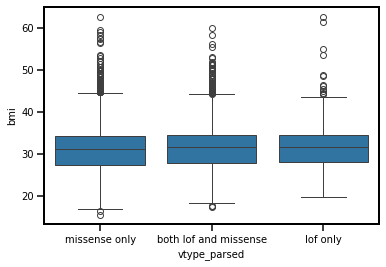

In [41]:
sns.boxplot(plot_df, x="vtype_parsed", y="bmi")

In [59]:
combo_vinfo_df.loc[:, ["uniq_items", "combo_samples", "variant", "vtype"]].to_csv("/data6/deepro/ukb_bmi/3_characterization/data/archive/combos_in_cohort/british/train_variant_info.csv", index=False)

In [43]:
test_df = cohort_df.loc[(cohort_df.samples=="1096941")&(cohort_df.gene=="SHC2")]

In [46]:
cvi1 = collapse_variant_info_by_gene(test_df)

/tmp/ipykernel_51251/913575059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["variant"] = df.gene + "_" + df.locus + "_" + df.alleles
/tmp/ipykernel_51251/913575059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vtype"] = df.apply(lambda x: "lof" if (x.lof or x.splice_lof) else "missense", axis=1)


In [47]:
test_df = cohort_df.loc[(cohort_df.samples=="1096941")&(cohort_df.gene=="SHC2")]
cvi2 = collapse_variant_info_by_gene(test_df)

/tmp/ipykernel_51251/913575059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["variant"] = df.gene + "_" + df.locus + "_" + df.alleles
/tmp/ipykernel_51251/913575059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vtype"] = df.apply(lambda x: "lof" if (x.lof or x.splice_lof) else "missense", axis=1)


In [52]:
cvi1 + "|" + cvi2

variant    BMPR1B_chr4:95129947_G_A|SHC2_chr19:422283_G_A
vtype                                   missense|missense
dtype: object

In [50]:
pd.concat([cvi1, cvi2], axis=1)

,0,1
variant,BMPR1B_chr4:95129947_G_A,SHC2_chr19:422283_G_A
vtype,missense,missense


In [21]:
cohort_df

,locus,alleles,gene,lof,missense,splice_lof,splice,del_score,samples
2753,chr1:999557,G_C,HES4,False,True,False,False,6.0,3341796
2753,chr1:999557,G_C,HES4,False,True,False,False,6.0,4116899
2755,chr1:999565,C_T,HES4,False,True,False,False,7.0,2938256
2757,chr1:999572,C_G,HES4,False,True,False,False,6.0,1323398
2757,chr1:999572,C_G,HES4,False,True,False,False,6.0,5381085
...,...,...,...,...,...,...,...,...,...
1942,chrX:49231213,T_C,CACNA1F,False,True,False,False,7.0,2796902
1947,chrX:49231238,G_C,CACNA1F,False,True,False,False,6.0,5663397
1947,chrX:49231238,G_C,CACNA1F,False,True,False,False,6.0,3566210
1950,chrX:49231284,A_C,CACNA1F,False,True,False,False,6.0,1773458
